<a href="https://colab.research.google.com/github/matheuslanca/Analise_De_Viagens_a_Servico/blob/main/An%C3%A1lise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
caminho_dados = "/content/drive/MyDrive/ACADÊMICO/Aprendendo AD/curso de python/2024_20250928_Viagens/2024_Viagem.csv"
caminho_figura = "/content/drive/MyDrive/ACADÊMICO/Aprendendo AD/curso de python/figura_2024.png"
caminho_tabela = "/content/drive/MyDrive/ACADÊMICO/Aprendendo AD/curso de python/tabela_2024.xlsx"

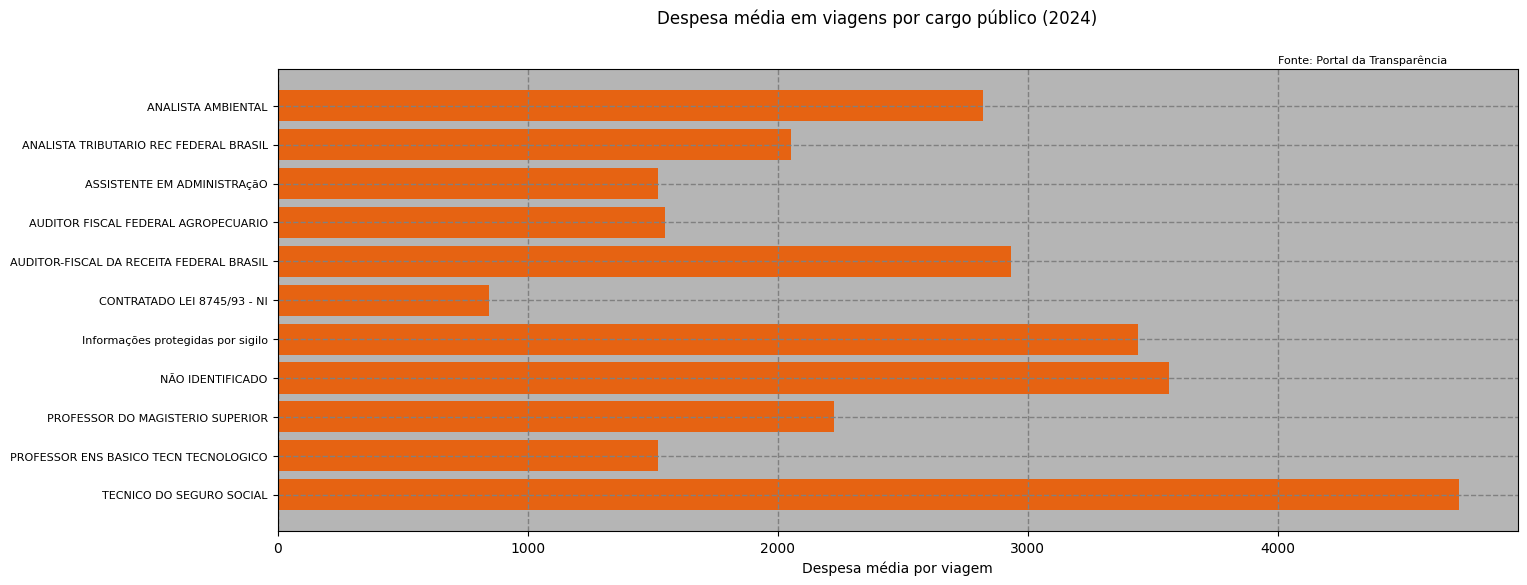

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None) # Mostrar todas as colunas
pd.set_option('display.float_format', '{:.2f}'.format) # Adaptando formato para float

# Lendo dados
df_viagens = pd.read_csv(caminho_dados, encoding="Windows-1252", sep=";", decimal=",")

# Criando coluna com despesas
df_viagens["Despesas"] = df_viagens["Valor diárias"] + df_viagens["Valor passagens"] + df_viagens["Valor outros gastos"]

# Ajustando valores nulos na coluna Cargo
df_viagens["Cargo"] = df_viagens["Cargo"].fillna("NÃO IDENTIFICADO")

# Convertendo colunas de data
df_viagens["Período - Data de início"] = pd.to_datetime(df_viagens["Período - Data de início"], format="%d/%m/%Y")
df_viagens["Período - Data de fim"] = pd.to_datetime(df_viagens["Período - Data de fim"], format="%d/%m/%Y")
# Criando uma coluna de mês de início da viagem
df_viagens["Mês da viagem"] = df_viagens["Período - Data de início"].dt.month_name()
# Calculando a duração da viagem
df_viagens["Duração da viagem"] = (df_viagens["Período - Data de fim"] - df_viagens["Período - Data de início"]).dt.days

# Agregando colunas de média de despesas, média de duração, soma total de despesas, destino mais frequente e número de viagens
df_viagens_consolidado = (
      df_viagens
      .groupby("Cargo")
      .agg(
          despesa_media=("Despesas", "mean"),
          duracao_media=("Duração da viagem", "mean"),
          despesas_totais=("Despesas", "sum"),
          destino_mais_frequente=("Destinos", pd.Series.mode),
          n_viagens=("Nome", "count")
          )
      .reset_index()
)

# Guardando a tabela viagens por Cargo normalizada em uma variável
df_cargos = df_viagens["Cargo"].value_counts(normalize=True).reset_index()
# Verificando relevância de cargos que fizeram mais de 1% das viagens
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, "Cargo"]
# Filtro para verificar se cargo é ou não relevante de acordo com variável
filtro = df_viagens_consolidado["Cargo"].isin(cargos_relevantes)
df_final = df_viagens_consolidado[filtro]

# Salvando tabela final
df_final.to_excel(caminho_tabela, index=False)

# Criando a figura
fig, ax = plt.subplots(figsize = (16, 6)) # Fig é a imagem inteira, ax é o local onde a figura é plotada

# Plotando o gráfico
ax.barh(df_final["Cargo"], df_final["despesa_media"], color="#e66312") # Definindo o eixo X e o eixo Y em um gráfico de barras horizontais e parâmetro color hexcode
ax.invert_yaxis() # Reordenando forma que os dados são mostrados

# Ajustes
ax.set_facecolor("#b5b5b5") # Cor de fundo
fig.suptitle("Despesa média em viagens por cargo público (2024)") # Definindo título do gráfico
plt.xlabel("Despesa média por viagem") # Rotulando o eixo X
plt.grid(color="gray", linestyle="--", linewidth=1) # Configurando a malha do plano
plt.figtext(0.75, 0.89, "Fonte: Portal da Transparência", fontsize=8) # Colocando fonte (x, y, texto, tamanho)
plt.yticks(fontsize=8) # Diminuindo a fonte das legendas do eixo Y

plt.savefig(caminho_figura, bbox_inches="tight")
